In [26]:
import os
import pymysql
import dotenv
from dotenv import load_dotenv
load_dotenv()

HOST = os.getenv('HOST')
USER = os.getenv('MYSQL_USER')
PASSWORD = os.getenv('MYSQL_ROOT_PASSWORD')
DB = os.getenv('MYSQL_DATABASE')

connection = pymysql.connect(host=HOST, 
                      user = USER,
                     password = PASSWORD,
                     db = DB)

cursor = connection.cursor()

* ## Quantos usuários únicos não jogaram após o dia 03/02/2020?
> A análise de jogos por usuário será feita a partir de updated_at (última atualização do registro), na tabela matchmaking_stats_summary

>OBS: updated_at e created_at possuem sempre a mesma data neste banco de dados
>Como o número de usuários que jogaram é diferente do número de usuários distintos, sei que um mesmo usuário jogou várias partidas.

In [2]:
#Retrieving the total user number:
total_registros = cursor.execute("SELECT player_id FROM matchmaking_stats_summary")
total = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary")
(total_registros, total)
#27 usuers has played more than one single date 

(2057, 2030)

In [3]:
#"%Y/%m/%d"
#Retrieving the number of players who played after this date 03/02/2020
strong_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at >= '2020-02-03'")
strong_players

1304

In [5]:
#Retrieving the number of player who haven't played
weak_players = total - strong_players
weak_players

726

* ## Quantos usuários únicos jogaram em fevereiro após o dia 06/02/2020?
> Usando o mesmo raciocínio do exercício anterior 

In [8]:
#Retrieving the total user number:
total = cursor.execute("SELECT distinct player_id FROM matchmaking_stats_summary")
total

2030

In [12]:
#Retrieving the number of users who played after the date 
faithful_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at > '2020-02-06 23:59:59'")
faithful_players

0

In [14]:
#or
faithful_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at >= '2020-02-07'")
faithful_players

0

* ## Em qual dia mais jogadores deixaram de jogar no mês de fevereiro?
>No caso, vou usar a mesma tabela, e fazer as operações passo a passo:

In [16]:
#Retrieving the number of active players during the month of February (players who updated their stats)
feb_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01 00:00:00' AND '2020-02-29 23:59:59'")
feb_players
#every player have done some update in their stats during this month

2030

* ### Checking by day:

In [19]:
day1 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01 00:00:00' AND '2020-02-01 23:59:59'")
day1

326

In [20]:
day2 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-02 00:00:00' AND '2020-02-02 23:59:59'")
day2

408

In [21]:
day3 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-03 00:00:00' and '2020-02-03 23:59:59'")
day3

313

In [22]:
day4 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-04 00:00:00' and '2020-02-04 23:59:59'")
day4

330

In [23]:
dia5 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-05 00:00:00' and '2020-02-05 23:59:59'")
dia5

338

In [24]:
dia6 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
dia6

330

 >## In the above case we can see that all players have played in February. We can notice that 03/02/2020 was the day where less players have played. 
>## We must be careful looking these numbers, because the variables dayN refers to the number of active single players in that day, but in this analyse we can't say who are the players. Thus, the sum of number of players of variables dayN are going to be higher than the feb_players variable (number of total single player in the February mounth). 
>## We can take a look in the intersection between these variables:

In [27]:
cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
a = cursor.fetchall()
cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
b = cursor.fetchall()

In [28]:
intersec = set(a).intersection(set(b))
len(intersec)

330

In [30]:
#The players ids
intersec

{(536,),
 (1903,),
 (5656,),
 (7612,),
 (7953,),
 (10783,),
 (13302,),
 (15327,),
 (15727,),
 (16863,),
 (17293,),
 (17601,),
 (18621,),
 (19120,),
 (20741,),
 (20882,),
 (23145,),
 (24023,),
 (27390,),
 (28357,),
 (28756,),
 (29553,),
 (30019,),
 (30309,),
 (30838,),
 (31133,),
 (33603,),
 (33732,),
 (36015,),
 (38043,),
 (38663,),
 (38728,),
 (39554,),
 (49760,),
 (58567,),
 (59201,),
 (66053,),
 (73644,),
 (74092,),
 (75077,),
 (76941,),
 (82824,),
 (83537,),
 (85158,),
 (87779,),
 (88377,),
 (94264,),
 (101769,),
 (102712,),
 (106041,),
 (112578,),
 (113818,),
 (118584,),
 (124713,),
 (128232,),
 (131266,),
 (137168,),
 (140846,),
 (141738,),
 (143142,),
 (143577,),
 (143905,),
 (144011,),
 (157136,),
 (157455,),
 (160572,),
 (168613,),
 (177856,),
 (185545,),
 (196112,),
 (201506,),
 (212934,),
 (221701,),
 (224276,),
 (234363,),
 (236304,),
 (236573,),
 (240625,),
 (241465,),
 (241767,),
 (251616,),
 (259723,),
 (262957,),
 (274639,),
 (282603,),
 (289303,),
 (292934,),
 (300080,

In [31]:
cursor.execute("SELECT CORR(total_wins, kills) FROM matchmaking_stats_summary;")

InternalError: (1370, "execute command denied to user 'QiOMXYrlNR'@'%' for routine 'QiOMXYrlNR.CORR'")

# Correlation Using Pandas

In [38]:
import pandas as pd
match = pd.read_csv('csv/matchmaking_stats.csv')

In [40]:
#Removing the unnecessaries columns
my_df = match.drop(columns=['player_id', 'created_at', 'updated_at'])
my_df

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
0,1,1,0,3,13,13,5,6
1,1,0,1,-1,15,20,3,2
2,1,0,1,-1,7,23,5,4
3,1,0,1,-1,11,21,3,8
4,1,1,0,3,21,13,2,11
...,...,...,...,...,...,...,...,...
2052,2,1,1,2,23,35,7,18
2053,1,1,0,3,11,12,3,1
2054,8,2,6,0,77,169,37,25
2055,1,1,0,3,17,13,3,15


* ## Aplying the Pearson Correlation Method:

In [41]:
my_df.corr(method ='pearson')

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
matches_played,1.000000,0.887964,0.878356,0.689930,0.974546,0.984908,0.949598,0.914814
total_wins,0.887964,1.000000,0.560330,0.944465,0.906658,0.855386,0.884865,0.881565
total_loss,0.878356,0.560330,1.000000,0.261150,0.812837,0.885040,0.790564,0.731682
mm_points,0.689930,0.944465,0.261150,1.000000,0.740193,0.651729,0.723895,0.743512
kills,0.974546,0.906658,0.812837,0.740193,1.000000,0.973337,0.956963,0.954986
death,0.984908,0.855386,0.885040,0.651729,0.973337,1.000000,0.953071,0.910926
assist,0.949598,0.884865,0.790564,0.723895,0.956963,0.953071,1.000000,0.901647
hs,0.914814,0.881565,0.731682,0.743512,0.954986,0.910926,0.901647,1.000000


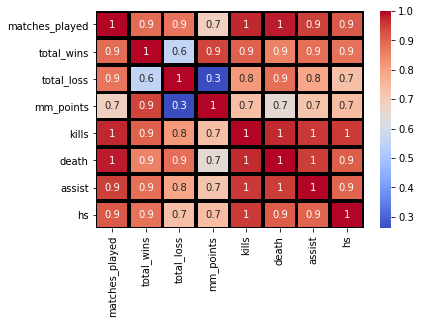

In [43]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
heatmap_chart = sns.heatmap(my_df.corr(method ='pearson'), annot = True, fmt='.1g', 
            cmap= 'coolwarm', linewidths=2.5, linecolor='black')
heatmap_chart